In [1]:
%matplotlib inline

# Generation of ROI dataset

In [2]:
import dicom, os, sys
import numpy as np
import pandas as pd
from scipy.misc import imresize
import matplotlib.pyplot as plt

## File 1

In [41]:
PathDicom = "../data/Sunnybrook Cardiac MR Database ContoursPart1"

lstFilesDCM_Online = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".txt" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM_Online.append(os.path.join(dirName,filename))

In [10]:
Contours_Online = pd.DataFrame(columns = ['tableaux'], index = range(len(lstFilesDCM_Online)))
for t in range(len(lstFilesDCM_Online)):
    if t%100 == 0:
        print(t)
    Image_Online_1 = pd.DataFrame(columns = ['abscisse','ordonnees'], index = range(len(lstFilesDCM_Online[t])))
    table_Online = pd.read_table(lstFilesDCM_Online[t], names = "1")
    for k in range(len(table_Online)):
        Image_Online_1['abscisse'][k] = float(table_Online["1"][k].split()[0])
        Image_Online_1['ordonnees'][k] = float(table_Online["1"][k].split()[1])
    Contours_Online['tableaux'][t] = np.array(Image_Online_1)

0
100
200
300
400
500


## File 2 Validation

In [11]:
PathDicom = "../data/Sunnybrook Cardiac MR Database ContoursPart2"
lstFilesDCM_Validation = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".txt" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM_Validation.append(os.path.join(dirName,filename))

In [13]:
Contours_Validation = pd.DataFrame(columns = ['tableaux'], index = range(len(lstFilesDCM_Validation)))
for t in range(len(lstFilesDCM_Validation)):
    if t%100 == 0:
        print(t)
    Image_Validation_1 = pd.DataFrame(columns = ['abscisse','ordonnees'], index = range(len(lstFilesDCM_Validation[t])))
    table_Validation = pd.read_table(lstFilesDCM_Validation[t], names = "1")
    for k in range(len(table_Validation)):
        Image_Validation_1['abscisse'][k] = float(table_Validation["1"][k].split()[0])
        Image_Validation_1['ordonnees'][k] = float(table_Validation["1"][k].split()[1])
    Contours_Validation['tableaux'][t] = np.array(Image_Validation_1)

0
100
200
300
400
500


## Part 2 Training

In [5]:
PathDicom = "../data/Sunnybrook Cardiac MR Database ContoursPart3"
lstFilesDCM_Training = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".txt" in filename.lower():  # check whether the file's DICOM
            if "icontour" in filename.lower():
                lstFilesDCM_Training.append(os.path.join(dirName,filename))

In [7]:
Contours_Training = pd.DataFrame(columns = ['tableaux'], index = range(len(lstFilesDCM_Training)))
for t in range(len(lstFilesDCM_Training)):
    if t%100 == 0:
        print(t)
    Image_Training_1 = pd.DataFrame(columns = ['abscisse','ordonnees'], index = range(len(lstFilesDCM_Training[t])))
    table_Training = pd.read_table(lstFilesDCM_Training[t], names = "1")
    for k in range(len(table_Training)):
        Image_Training_1['abscisse'][k] = float(table_Training["1"][k].split()[0])
        Image_Training_1['ordonnees'][k] = float(table_Training["1"][k].split()[1])
    Contours_Training['tableaux'][t] = np.array(Image_Training_1)

0
100
200


## Create Table of ROI Online

In [45]:
ROI_Online = pd.DataFrame(columns = ['ROI'], index = range(len(Contours_Online)))
for t in range(len(Contours_Online)):
    if t%100 == 0:
        print(t)
    Image = Contours_Online['tableaux'][t]
    ROI_1 = np.zeros((64,64))
    center_1_x = 0.
    center_1_y = 0.
    for k in range(Image.shape[0]):
        center_1_x += Image[k][0]/Image.shape[0]
        center_1_y += Image[k][1]/Image.shape[0]
    for i in range(64):
        for j in range(64):
            if i > np.floor(center_1_x/4) - 16 and i < np.floor(center_1_x/4) + 16 and j > np.floor(center_1_y/4) - 16 and j < np.floor(center_1_y/4) + 16:
                ROI_1[i][j] = 1
    ROI_Online['ROI'][t] = ROI_1

0
100
200
300
400
500


(64, 64)


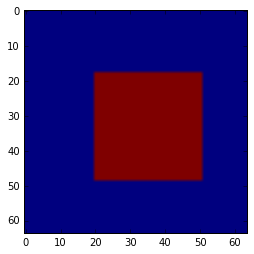

In [11]:
print(ROI_Training['ROI'][0].shape)
plt.imshow(ROI_Training['ROI'][0])

## Create ROI Validation

In [77]:
ROI_Validation = pd.DataFrame(columns = ['ROI'], index = range(len(Contours_Validation)))
for t in range(len(Contours_Validation)):
    if t%100 == 0:
        print(t)
    Image = Contours_Validation['tableaux'][t]
    ROI_1 = np.zeros((64,64))
    center_1_x = 0.
    center_1_y = 0.
    for k in range(Image.shape[0]):
        center_1_x += Image[k][0]/Image.shape[0]
        center_1_y += Image[k][1]/Image.shape[0]
    for i in range(64):
        for j in range(64):
            if i > np.floor(center_1_x/4) - 16 and i < np.floor(center_1_x/4) + 16 and j > np.floor(center_1_y/4) - 16 and j < np.floor(center_1_y/4) + 16:
                ROI_1[i][j] = 1
    ROI_Validation['ROI'][t] = ROI_1

0
100
200
300
400
500


## Create ROI Training

In [8]:
ROI_Training = pd.DataFrame(columns = ['ROI'], index = range(len(Contours_Training)))
for t in range(len(Contours_Training)):
    if t%100 == 0:
        print(t)
    Image = Contours_Training['tableaux'][t]
    ROI_1 = np.zeros((64,64))
    center_1_x = 0.
    center_1_y = 0.
    for k in range(Image.shape[0]):
        center_1_x += Image[k][0]/Image.shape[0]
        center_1_y += Image[k][1]/Image.shape[0]
    for i in range(64):
        for j in range(64):
            if i > np.floor(center_1_x/4) - 16 and i < np.floor(center_1_x/4) + 16 and j > np.floor(center_1_y/4) - 16 and j < np.floor(center_1_y/4) + 16:
                ROI_1[i][j] = 1
    ROI_Training['ROI'][t] = ROI_1

0
100
200


In [9]:
ROI_Online['ROI'][0].shape

NameError: name 'ROI_Online' is not defined

In [10]:
ROI_Training['ROI'][0].shape

(64, 64)

In [81]:
ROI_Validation['ROI'][0].shape

(64, 64)

In [12]:
import h5py

In [15]:
n = ROI_Training.shape[0]

OUTPUT = '../data/roi_training.h5'

with h5py.File(OUTPUT, 'w') as hf:
    X = hf.create_dataset("X", (n, 64, 64), maxshape=(None, 64, 64))
    for k in range(n):
        X[k,:,:] = ROI_Training['ROI'][k]

In [35]:
file_h5 = h5py.File(OUTPUT, "r")

In [86]:
n = ROI_Validation.shape[0]

OUTPUT = '../data/roi_validation.h5'

with h5py.File(OUTPUT, 'w') as hf:
    X = hf.create_dataset("X", (n, 64, 64), maxshape=(None, 64, 64))
    for k in range(n):
        X[k,:,:] = ROI_Validation['ROI'][k]

In [87]:
file_h5 = h5py.File(OUTPUT, "r")

In [88]:
n = ROI_Online.shape[0]

OUTPUT = '../data/roi_online.h5'

with h5py.File(OUTPUT, 'w') as hf:
    X = hf.create_dataset("X", (n, 64, 64), maxshape=(None, 64, 64))
    for k in range(n):
        X[k,:,:] = ROI_Online['ROI'][k]

In [89]:
len(lstFilesDCM_Training)

495